<a href="https://colab.research.google.com/github/9-coding/Computer_Vision/blob/main/LeNet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 170498071/170498071 [00:01<00:00, 86423142.94it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


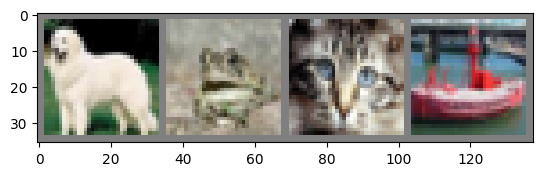

dog  frog cat  ship 


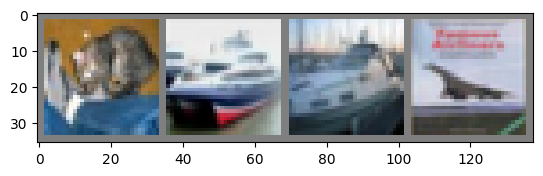

GroundTruth:   cat    ship   ship   plane
Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
cuda:0
 [1,  2000] loss: 2.187
 [1,  4000] loss: 1.857
 [1,  6000] loss: 1.675
 [1,  8000] loss: 1.589
 [1, 10000] loss: 1.518
 [1, 12000] loss: 1.479
 [2,  2000] loss: 1.410
 [2,  4000] loss: 1.361
 [2,  6000] loss: 1.330
 [2,  8000] loss: 1.327
 [2, 10000] loss: 1.286
 [2, 12000] loss: 1.273
Finished Training
Accuracy of the network on the 10000 test images: 55 %
Accuracy for class: plane is 54.3 %
Accuracy for class: car   is 59.1 %
Accuracy for class: bird  is 49.6 %
Accuracy for class: cat   is 55.8 %
Accuracy for class: deer  is 37.3 %
Accuracy for cla

In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(''.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

dataiter = iter(testloader)

dataiter = iter(testloader)
images, labels = next(dataiter)

#print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f' {classes[labels[j]]:5s}' for j in range (4)))

class Net (nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn. Conv2d(3, 6, 5)
    self.pool = nn. MaxPool2d(2, 2)
    self.conv2 = nn. Conv2d(6, 16, 5)
    self.fc1 = nn. Linear (16*5*5, 120)
    self.fc2= nn. Linear (120, 84)
    self.fc3 = nn. Linear(84, 10)
  def forward (self, x):
    x = self.pool (F.relu(self.conv1(x)))
    x = self.pool (F.relu (self.conv2(x)))
    x = torch.flatten (x, 1) #flatten all dimensions except batch
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()
print(net)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)



for epoch in range(2): #loop over the dataset multiple times
  running_loss = 0.0
  for i, data in enumerate (trainloader, 0):
    #get the inputs; data is a list of [inputs, labels]
    inputs, labels = data[0].to(device), data[1].to(device)

    #zero the parameter gradients
    optimizer.zero_grad()

    #forward + backward + optimize
    outputs = net(inputs)
    loss = criterion (outputs, labels)
    loss.backward()
    optimizer.step()

    #print statistics
    running_loss += loss.item()
    if i % 2000 == 1999: #print every 2000 mini-batches
      print (f' [{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
      running_loss = 0.0

print('Finished Training')

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

net = Net()
net.load_state_dict (torch.load(PATH))

net.to(device)

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs

with torch.no_grad():
  for data in testloader:
    images, labels = data[0].to (device), data[1].to(device)
    #calculate outputs by running images through the network
    outputs = net (images)
    #the class with the highest energy is what we choose as prediction
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print (f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

# 5. Test the network on the test data
#prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
  for data in testloader:
    images, labels = data[0].to(device), data[1].to(device)
    outputs = net(images)
    _, predictions = torch.max(outputs, 1)
    #collect the correct predictions for each class
    for label, prediction in zip(labels, predictions):
      if label == prediction:
        correct_pred[classes[label]] += 1
      total_pred[classes[label]] += 1

#print accuracy for each class
for classname, correct_count in correct_pred.items():
  accuracy = 100 * float(correct_count) / total_pred[classname]
  print (f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')